In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from Visualisation import Image_reconstructor, plot_image
from utils import inspect_label
from Kernels import RBF
from utils import create_Submissioncsv
from tqdm import tqdm

import random

from features_extractor_Kernel_PCA import KernelPCA
from features_extractor_HOG import get_hog_feature

from SVM_All_Version import Multi_Class_SVM_Classifier_OvO, Multi_Class_SVM_Classifier_OvA

In [5]:
random.seed(48)

## Visualisation of the data

In [10]:
#test_set = np.array(pd.read_csv('C:/Users/frank/Downloads/Challenge Kernel method/Xte.csv',header=None,sep=',',usecols=range(3072)))
#train_set = np.array(pd.read_csv('C:/Users/frank/Downloads/Challenge Kernel method/Xtr.csv',header=None,sep=',',usecols=range(3072)))
#train_label = np.array(pd.read_csv('C:/Users/frank/Downloads/Challenge Kernel method/Ytr.csv',sep=',',usecols=[1])).squeeze()

test_set = np.array(pd.read_csv("C:/Users/nguim/OneDrive/Bureau/Franki/Challenge Kernel method_just/Challenge Kernel method/Xte.csv",header=None,sep=',',usecols=range(3072)))
train_set = np.array(pd.read_csv("C:/Users/nguim/OneDrive/Bureau/Franki/Challenge Kernel method_just/Challenge Kernel method/Xtr.csv",header=None,sep=',',usecols=range(3072)))
train_label = np.array(pd.read_csv("C:/Users/nguim/OneDrive/Bureau/Franki/Challenge Kernel method_just/Challenge Kernel method/Ytr.csv",sep=',',usecols=[1])).squeeze()


In [11]:
print(f'test set size: {test_set.shape}')
print(f'train set size: {train_set.shape}')
print(f'train set labet size: {train_label.shape}')

test set size: (2000, 3072)
train set size: (5000, 3072)
train set labet size: (5000,)


In [12]:
train_set, val_set, train_label, val_label = train_test_split(train_set, train_label, test_size=.2, random_state= 48)

In [13]:
train_set = Image_reconstructor(train_set)
val_set = Image_reconstructor(val_set)
test_set = Image_reconstructor(test_set)


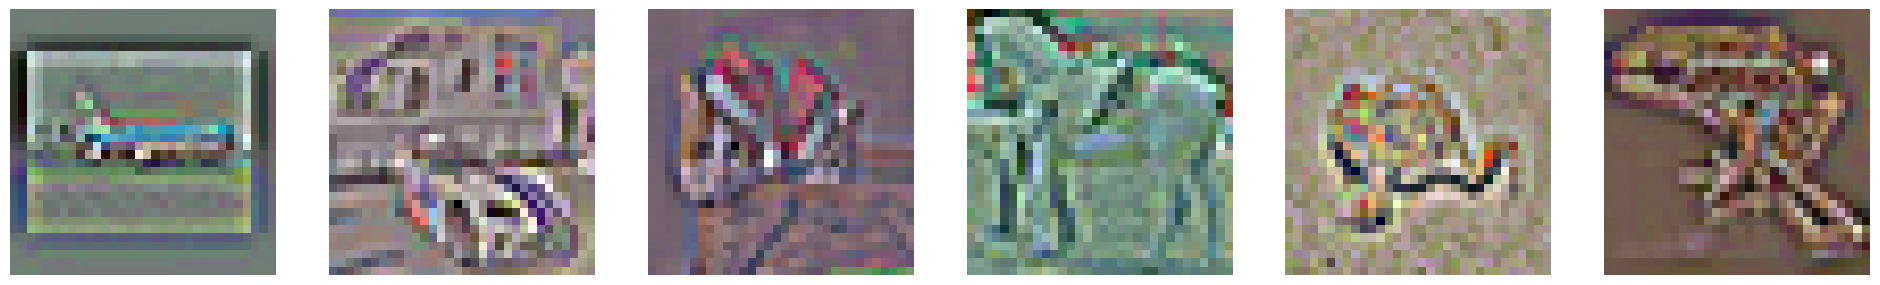

In [14]:
plot_image(train_set)

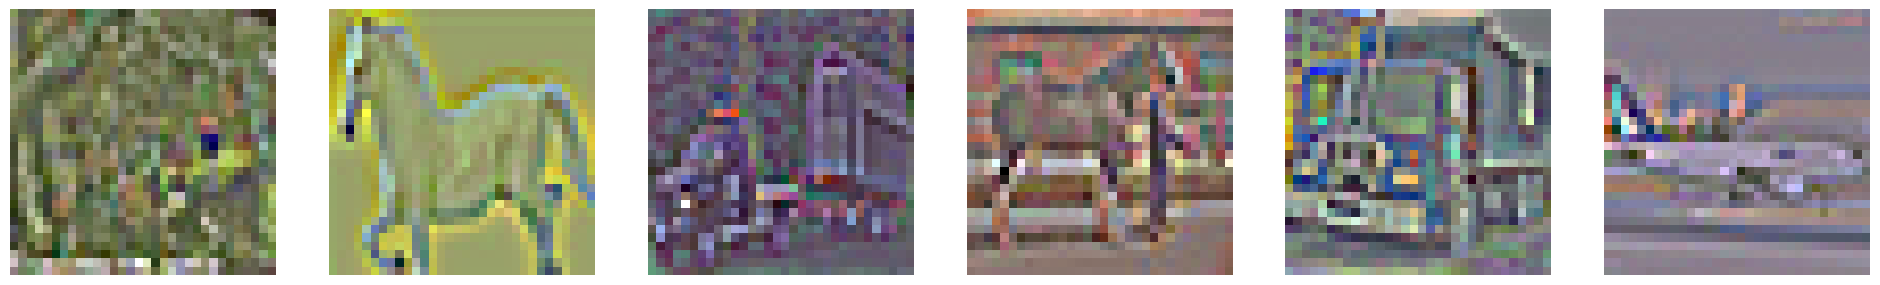

In [16]:
plot_image(test_set)

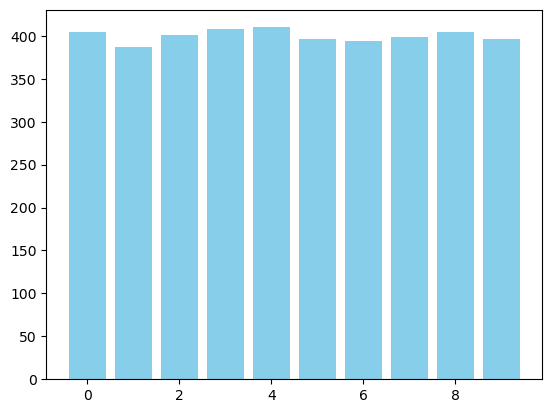

In [18]:
inspect_label(train_label)

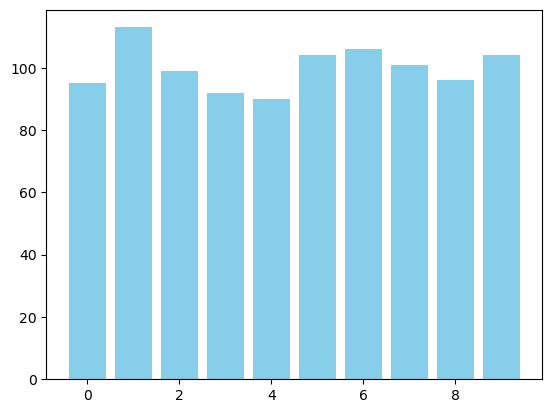

In [19]:
inspect_label(val_label)

#### 1) Modifie HOG + RBF kernel 

In this part, I use a modified version of Histogram of Oriented Gradiant to extract relevent features before applying Kernel PCA (with gaussian kernel). I use gridsearch to search for "good" hyperparameters

In [20]:
'''C_values = [0.1, 1, 10]
sigma_values = [0.01, 0.18, 1, 10]
div_values = [16, 8]

best_accuracy = 0
best_C = None
best_sigma = None

# Loop over the values of hyperparameters
for C in tqdm(C_values):
    for sigma in tqdm(sigma_values):
        for div in div_values:
            features_train = get_hog_feature(train_set, div)
            features_val = get_hog_feature(val_set, div)

            # Create a multiclass SVM classifier with current hyperparameters

            kernel = RBF(sigma).kernel
            model = Multi_Class_SVM_Classifier_OvO(C=C, kernel=kernel)

        
            # Train the model on training data
            model.fit(features_train, train_label)
        
            # Predict on validation data
            Y_val_pred = model.predict(features_val)
        
            # Calculate accuracy to evaluate the model
            accuracy = np.sum(val_label == Y_val_pred)/len(val_label)
            print("C=", C," sigma=", sigma, " div=", div, " accuracy=", accuracy)
        
        # Update best hyperparameters if accuracy is better
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_C = C
            best_sigma = sigma

# Print the best hyperparameters found
print("Best hyperparameters found:")
print("C =", best_C)
print("Sigma =", best_sigma)'''


'C_values = [0.1, 1, 10]\nsigma_values = [0.01, 0.18, 1, 10]\ndiv_values = [16, 8]\n\nbest_accuracy = 0\nbest_C = None\nbest_sigma = None\n\n# Loop over the values of hyperparameters\nfor C in tqdm(C_values):\n    for sigma in tqdm(sigma_values):\n        for div in div_values:\n            features_train = get_hog_feature(train_set, div)\n            features_val = get_hog_feature(val_set, div)\n\n            # Create a multiclass SVM classifier with current hyperparameters\n\n            kernel = RBF(sigma).kernel\n            model = Multi_Class_SVM_Classifier_OvO(C=C, kernel=kernel)\n\n        \n            # Train the model on training data\n            model.fit(features_train, train_label)\n        \n            # Predict on validation data\n            Y_val_pred = model.predict(features_val)\n        \n            # Calculate accuracy to evaluate the model\n            accuracy = np.sum(val_label == Y_val_pred)/len(val_label)\n            print("C=", C," sigma=", sigma, " div=

In [21]:
C= 10
div = 8
sigma = 0.18



In [26]:
features_train = get_hog_feature(train_set, div)
features_val = get_hog_feature(val_set, div)
features_test = get_hog_feature(test_set, div)

In [27]:
kernel = RBF(sigma).kernel
model = Multi_Class_SVM_Classifier_OvO(C, kernel)
model.fit(features_train, train_label)

In [28]:
Y_val_pred = model.predict(features_val)

In [29]:
np.sum(Y_val_pred == val_label)/len(val_label)

0.547

In [30]:
Y_test_pred = model.predict(features_test)                                                                                                                                                                                                           

In [35]:
create_Submissioncsv(Y_test_pred)

In [38]:
#from sklearn.metrics import accuracy_score
#accuracy = accuracy_score(Y_val_pred, Y_test_pred)
#print('Accuracy:', accuracy)